In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Load Data

In [3]:
(X_train, Y_train), (X_test, Y_test)= mnist.load_data()

In [4]:
type(X_train)

numpy.ndarray

In [5]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


60.000 train, 10.000 test

In [6]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [7]:
print(X_train[10].shape)

(28, 28)


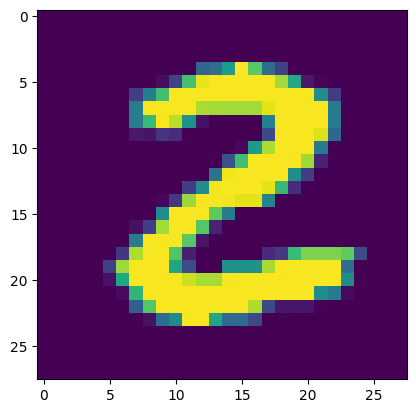

2


In [8]:
plt.imshow(X_train[25])
plt.show()

print(Y_train[25])

In [9]:
print(Y_train.shape,Y_test.shape)

(60000,) (10000,)


In [10]:
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


Scalling 


In [11]:
X_train=X_train/255
X_test=X_test/255

Building the NN - basic

Layer

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

C:\Users\mmmas\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Train the model

In [14]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8564 - loss: 0.5084
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9551 - loss: 0.1495  
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 950us/step - accuracy: 0.9684 - loss: 0.1067
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9758 - loss: 0.0829
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9793 - loss: 0.0672
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9833 - loss: 0.0559
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9862 - loss: 0.0471
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9885 - loss: 0.0399
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 981us/step - accuracy: 0.9898 - loss: 0.0342
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 949us/step - accuracy: 0.9892 - loss: 0.0329


In [18]:
loss , accuracy = model.evaluate (X_test,Y_test)
print (accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9684 - loss: 0.1212
0.972100019454956


In [19]:
print(X_test.shape)

(10000, 28, 28)


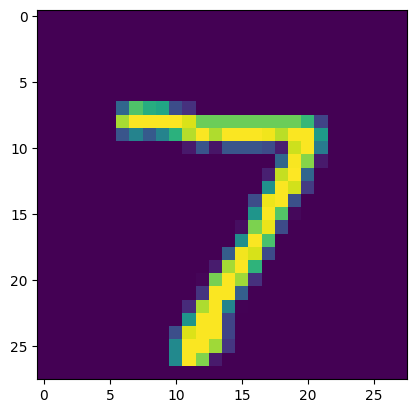

In [20]:
plt.imshow(X_test[0])
plt.show()

In [21]:
print(Y_test[0])

7


In [22]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [23]:
print(Y_pred.shape)

(10000, 10)


In [24]:
print(Y_pred[0])

[2.9378691e-10 3.4870709e-13 1.7660018e-10 4.4170656e-06 2.5043773e-16
 7.8496099e-12 8.5752182e-21 9.9999559e-01 1.7393031e-09 5.4548197e-09]


convert

In [25]:
label_for_first_image = np.argmax(Y_pred[0])
print(label_for_first_image)

7


In [26]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 4, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

confusion matrix

In [29]:
conf_mat=confusion_matrix(Y_test, Y_pred_labels)

In [30]:
print(conf_mat)

tf.Tensor(
[[ 970    0    1    1    0    0    0    3    3    2]
 [   0 1110    2    2    0    1    4    3   13    0]
 [   7    4  995    7    3    0    2    9    5    0]
 [   0    0    0  998    0    1    0    6    4    1]
 [   1    0    2    0  963    0    5    6    1    4]
 [   3    1    0   18    3  850    5    4    6    2]
 [   7    1    1    1    2    4  940    1    1    0]
 [   1    3    9    2    0    0    0 1005    3    5]
 [   3    1    3    9    6    5    4    4  936    3]
 [   3    3    0    7   20    3    1   14    4  954]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'predicted labels')

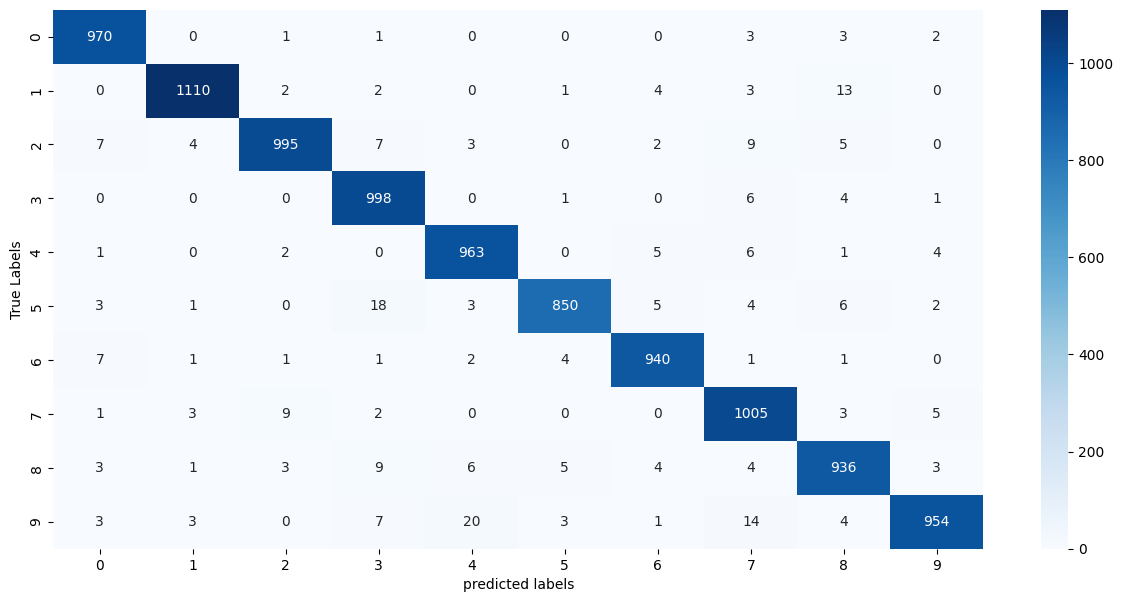

In [31]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('predicted labels')

now you build a traind predective
model, try to add images that is not included in the dataset

Building a Predictive System

In [33]:
input_image_path='image_7.png'
input_image = cv2.imread(input_image_path)

In [34]:
type(input_image)

numpy.ndarray

In [35]:
print(input_image)

[[[247 247 247]
  [247 247 247]
  [247 247 247]
  ...
  [247 247 247]
  [247 247 247]
  [247 247 247]]

 [[247 247 247]
  [247 247 247]
  [247 247 247]
  ...
  [247 247 247]
  [247 247 247]
  [247 247 247]]

 [[247 247 247]
  [247 247 247]
  [247 247 247]
  ...
  [247 247 247]
  [247 247 247]
  [247 247 247]]

 ...

 [[247 247 247]
  [247 247 247]
  [247 247 247]
  ...
  [247 247 247]
  [247 247 247]
  [247 247 247]]

 [[247 247 247]
  [247 247 247]
  [247 247 247]
  ...
  [247 247 247]
  [247 247 247]
  [247 247 247]]

 [[247 247 247]
  [247 247 247]
  [247 247 247]
  ...
  [247 247 247]
  [247 247 247]
  [247 247 247]]]


In [48]:
cv2.imshow("test", input_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [49]:
input_image.shape

(1081, 860, 3)

In [50]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [51]:
grayscale.shape

(1081, 860)

In [52]:
input_image_resize = cv2.resize(grayscale, (28,28))

In [53]:
input_image_resize.shape

(28, 28)

In [54]:
cv2.imshow("test", input_image_resize)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [55]:
input_image_resize = input_image_resize/255

In [56]:
image_reshape = np.reshape(input_image_resize, [1,28,28])

In [57]:
input_prediction = model.predict(image_reshape)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
[[1.0595797e-04 3.7909244e-17 3.8183365e-02 1.1151926e-05 0.0000000e+00
  5.5458586e-06 1.2718172e-25 9.6169406e-01 2.5639957e-29 2.3213307e-29]]


In [58]:
input_pred_label= np.argmax(input_prediction)

In [59]:
print(input_pred_label)

7


input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)